In [11]:
%pip install wordcloud 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string

In [2]:
# Load the Main.xlsx file
file_path = "BiasFignews/data/FIGNEWS-2024.tsv"  
df = pd.read_csv(file_path, sep='\t')

# Display the first few rows of the dataset to understand its structure
df.head()


,batch,source_language,id,type,sheet_type,team_name,annotator_id,subtask,label,text,arabic_mt,english_mt,notes
0,B01,English,1,MAIN,MAIN,SQUad,2,Bias,Biased against others,Yemen's Houthis have waded into the Israel-Ham...,خاض الحوثيون في اليمن الحرب بين إسرائيل وحماس ...,Yemen's Houthis have waded into the Israel-Ham...,NaN
1,B01,English,2,MAIN,MAIN,SQUad,2,Bias,Unbiased,Isreal - Hamas Conflict | Face to Face,إسرائيل - الصراع مع حماس | وجها لوجه,Isreal - Hamas Conflict | Face to Face,NaN
2,B01,English,4,MAIN,MAIN,SQUad,2,Bias,Biased against others,Videos show how armed men from Gaza stormed a ...,أظهرت مقاطع فيديو كيف اقتحم مسلحون من غزة مهرج...,Videos show how armed men from Gaza stormed a ...,NaN
3,B01,English,7,MAIN,MAIN,SQUad,2,Bias,Unclear,Protest in Aligarh Muslim University in suppor...,وقفة احتجاجية في جامعة عليكرة الإسلامية دعما ل...,Protest in Aligarh Muslim University in suppor...,NaN
4,B01,English,8,MAIN,MAIN,SQUad,2,Bias,Biased against both Palestine and Israel,IDF releases audio recording about misfired ro...,الجيش الإسرائيلي ينشر تسجيلًا صوتيًا حول صاروخ...,IDF releases audio recording about misfired ro...,NaN


Analyzing text artifacts (Sample of 5000 rows)...

--- Percentage of Rows Containing Artifacts ---
English_Chars    32.8
Digits           44.9
dtype: float64


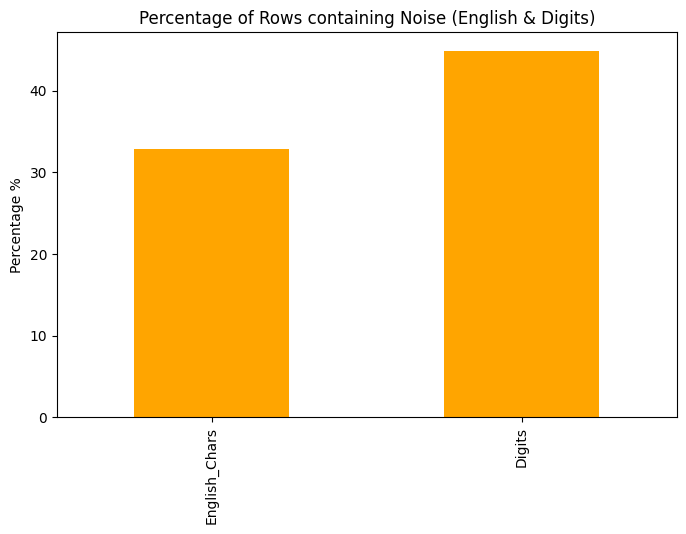

In [44]:
import re
import pandas as pd
import matplotlib.pyplot as plt

def analyze_noise(text):
    if not isinstance(text, str): return pd.Series([0, 0])
    
    # Regex patterns (Only English and Digits now)
    english = len(re.findall(r'[a-zA-Z]', text))
    digits = len(re.findall(r'\d', text))
    
    return pd.Series([english, digits])

# Apply to a sample
print("Analyzing text artifacts (Sample of 5000 rows)...")
noise_df = df_bias['arabic_mt'].sample(min(5000, len(df_bias)), random_state=42).apply(analyze_noise)

# Rename columns to match the 2 values we are returning
noise_df.columns = ['English_Chars', 'Digits']

# Calculate % of rows that have these artifacts
rows_with_artifacts = (noise_df > 0).mean() * 100

print("\n--- Percentage of Rows Containing Artifacts ---")
print(rows_with_artifacts)

# Visual
plt.figure(figsize=(8, 5))
rows_with_artifacts.plot(kind='bar', color='orange')
plt.title('Percentage of Rows containing Noise (English & Digits)')
plt.ylabel('Percentage %')
plt.show()


--- Sentence Length Statistics ---
       raw_char_len  raw_word_count
count  88500.000000    88500.000000
mean     319.168045       50.842927
std      463.301314       79.511976
min        4.000000        1.000000
25%      108.000000       17.000000
50%      184.000000       28.000000
75%      331.000000       48.000000
max     5847.000000     1064.000000


C:\Users\hossa\AppData\Local\Temp\ipykernel_25708\3795050400.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='raw_word_count', data=df_bias, palette='coolwarm')


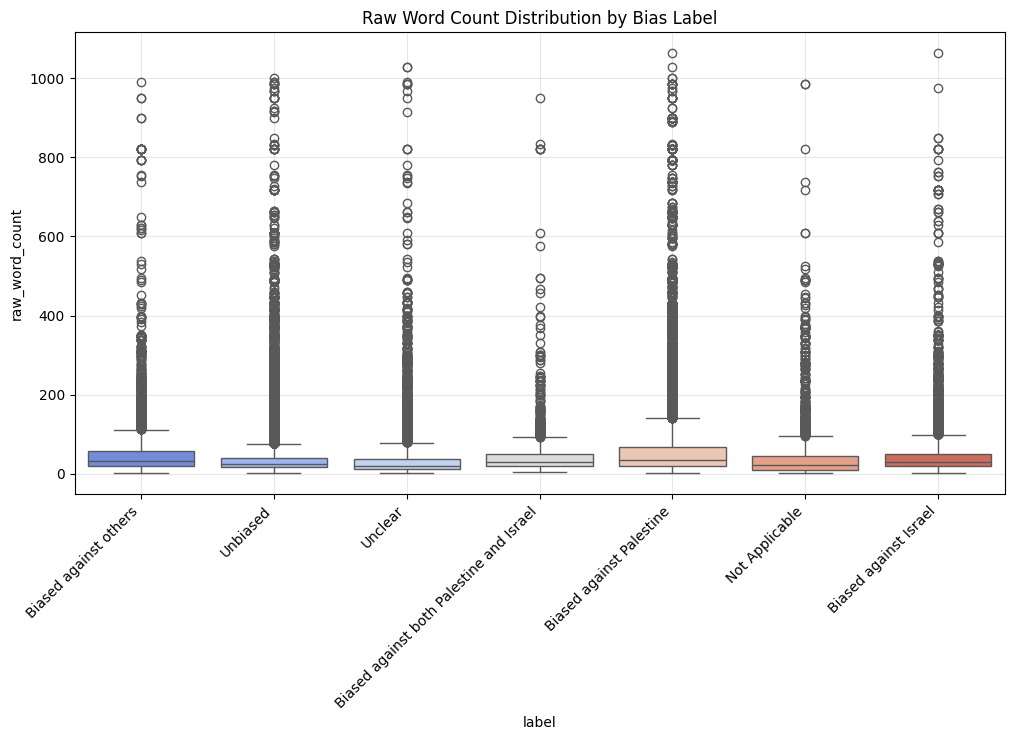

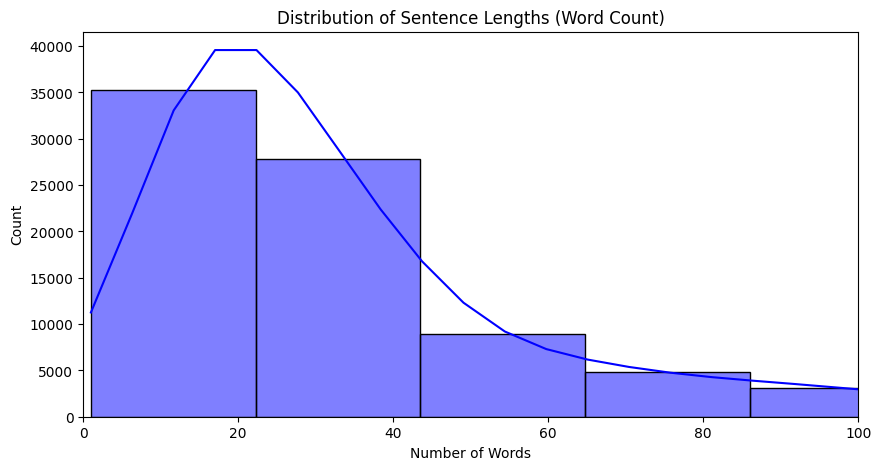

In [21]:
# Create temporary columns for analysis
df_bias['raw_char_len'] = df_bias['arabic_mt'].apply(lambda x: len(str(x)))
df_bias['raw_word_count'] = df_bias['arabic_mt'].apply(lambda x: len(str(x).split()))

# 1. Summary Statistics
print("\n--- Sentence Length Statistics ---")
print(df_bias[['raw_char_len', 'raw_word_count']].describe())

# 2. Visualizing Length by Label
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='raw_word_count', data=df_bias, palette='coolwarm')
plt.title('Raw Word Count Distribution by Bias Label')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.show()

# 3. Histogram of Lengths
plt.figure(figsize=(10, 5))
sns.histplot(df_bias['raw_word_count'], bins=50, kde=True, color='blue')
plt.title('Distribution of Sentence Lengths (Word Count)')
plt.xlim(0, 100) # Limit x-axis to see the bulk of data clearly
plt.xlabel('Number of Words')
plt.show()

In [3]:
df.columns

Index(['batch', 'source_language', 'id', 'type', 'sheet_type', 'team_name',
       'annotator_id', 'subtask', 'label', 'text', 'arabic_mt', 'english_mt',
       'notes'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129800 entries, 0 to 129799
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   batch            129800 non-null  object
 1   source_language  129800 non-null  object
 2   id               129800 non-null  int64 
 3   type             129800 non-null  object
 4   sheet_type       129800 non-null  object
 5   team_name        129800 non-null  object
 6   annotator_id     129800 non-null  int64 
 7   subtask          129800 non-null  object
 8   label            129800 non-null  object
 9   text             129800 non-null  object
 10  arabic_mt        129800 non-null  object
 11  english_mt       129800 non-null  object
 12  notes            1751 non-null    object
dtypes: int64(2), object(11)
memory usage: 12.9+ MB


In [5]:
df.isnull().sum()

batch                   0
source_language         0
id                      0
type                    0
sheet_type              0
team_name               0
annotator_id            0
subtask                 0
label                   0
text                    0
arabic_mt               0
english_mt              0
notes              128049
dtype: int64

In [6]:
# Filter rows where 'Type' (subtask) is 'bias'
df_bias = df[df['subtask'] == 'Bias']

# Display the first few rows to ensure filtering was successful
df_bias.head()



,batch,source_language,id,type,sheet_type,team_name,annotator_id,subtask,label,text,arabic_mt,english_mt,notes
0,B01,English,1,MAIN,MAIN,SQUad,2,Bias,Biased against others,Yemen's Houthis have waded into the Israel-Ham...,خاض الحوثيون في اليمن الحرب بين إسرائيل وحماس ...,Yemen's Houthis have waded into the Israel-Ham...,NaN
1,B01,English,2,MAIN,MAIN,SQUad,2,Bias,Unbiased,Isreal - Hamas Conflict | Face to Face,إسرائيل - الصراع مع حماس | وجها لوجه,Isreal - Hamas Conflict | Face to Face,NaN
2,B01,English,4,MAIN,MAIN,SQUad,2,Bias,Biased against others,Videos show how armed men from Gaza stormed a ...,أظهرت مقاطع فيديو كيف اقتحم مسلحون من غزة مهرج...,Videos show how armed men from Gaza stormed a ...,NaN
3,B01,English,7,MAIN,MAIN,SQUad,2,Bias,Unclear,Protest in Aligarh Muslim University in suppor...,وقفة احتجاجية في جامعة عليكرة الإسلامية دعما ل...,Protest in Aligarh Muslim University in suppor...,NaN
4,B01,English,8,MAIN,MAIN,SQUad,2,Bias,Biased against both Palestine and Israel,IDF releases audio recording about misfired ro...,الجيش الإسرائيلي ينشر تسجيلًا صوتيًا حول صاروخ...,IDF releases audio recording about misfired ro...,NaN


Bias label distribution:
label
Unbiased                                    37862
Biased against Palestine                    25810
Biased against Israel                        9679
Biased against others                        5638
Unclear                                      5624
Not Applicable                               2481
Biased against both Palestine and Israel     1406
Name: count, dtype: int64


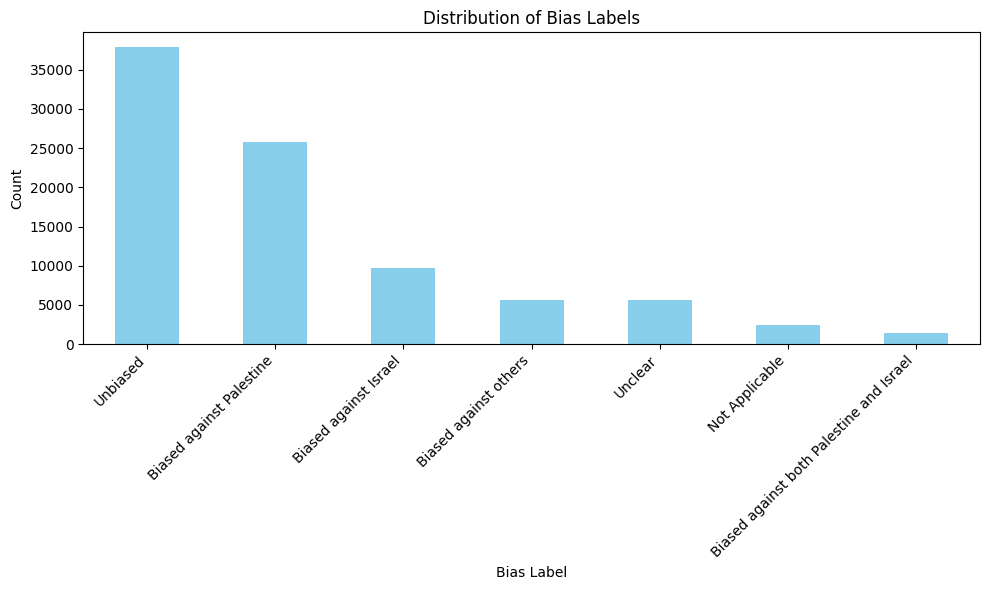

In [7]:
# Check the distribution of Bias labels
bias_counts = df_bias['label'].value_counts()

# Print the distribution of Bias labels
print("Bias label distribution:")
print(bias_counts)

# Optionally, plot the distribution of Bias labels using a bar chart

bias_counts.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title("Distribution of Bias Labels")
plt.xlabel("Bias Label")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Average Text Length per Bias Category:
label
Biased against Israel                       53.852257
Biased against Palestine                    66.949671
Biased against both Palestine and Israel    57.011380
Biased against others                       57.133913
Not Applicable                              50.099557
Unbiased                                    43.158734
Unclear                                     44.418919
Name: Text_Length, dtype: float64


C:\Users\hossa\AppData\Local\Temp\ipykernel_25708\988155809.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bias['Text_Length'] = df_bias['text'].apply(lambda x: len(str(x).split()))


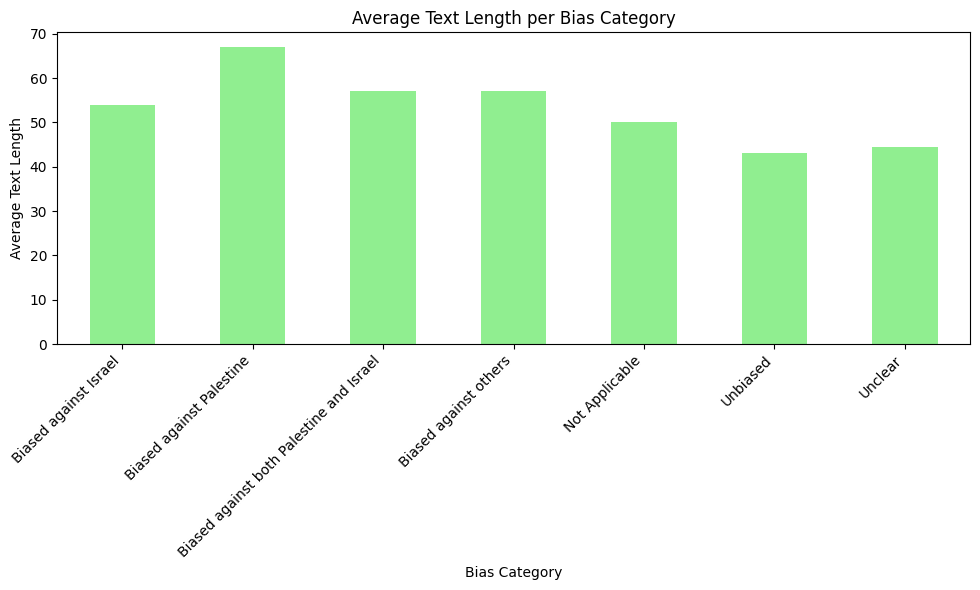

In [8]:
# Calculate the word length of each post
df_bias['Text_Length'] = df_bias['text'].apply(lambda x: len(str(x).split()))

# Calculate the average text length for each bias class
bias_text_length = df_bias.groupby('label')['Text_Length'].mean()

# Print the average text length for each Bias label
print("Average Text Length per Bias Category:")
print(bias_text_length)

# Optionally, plot the average text length for each Bias label
bias_text_length.plot(kind='bar', color='lightgreen', figsize=(10, 6))
plt.title("Average Text Length per Bias Category")
plt.xlabel("Bias Category")
plt.ylabel("Average Text Length")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

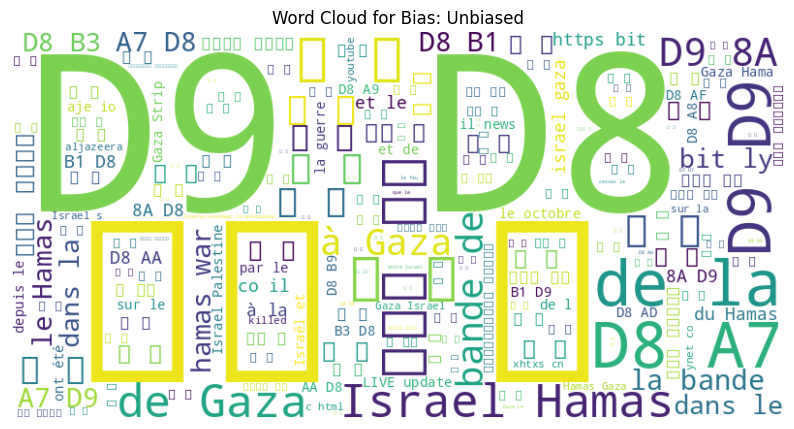

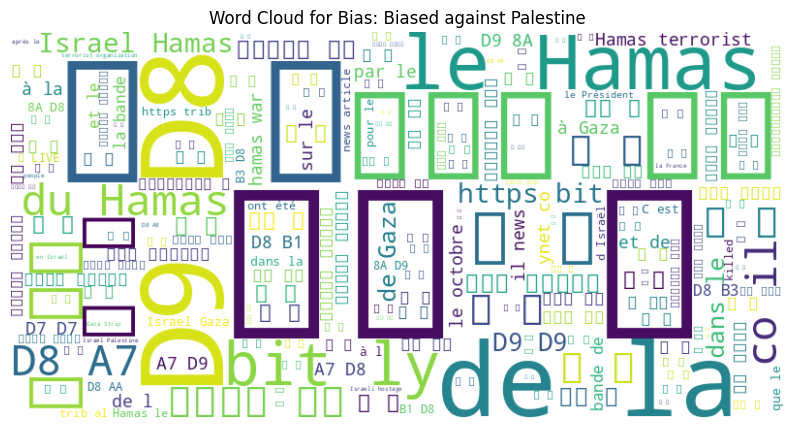

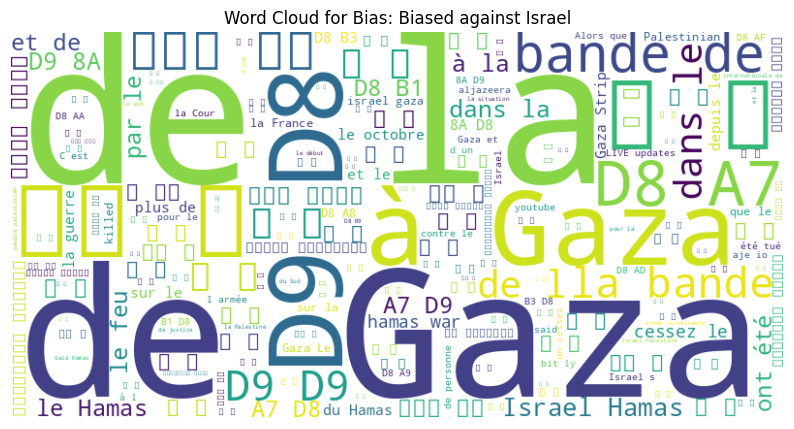

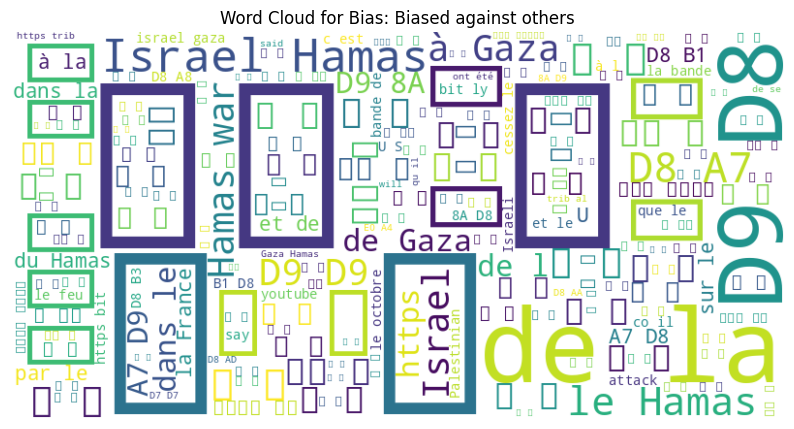

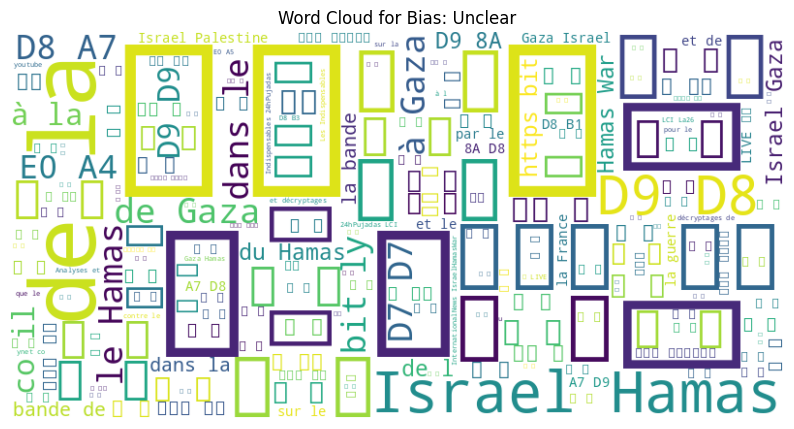

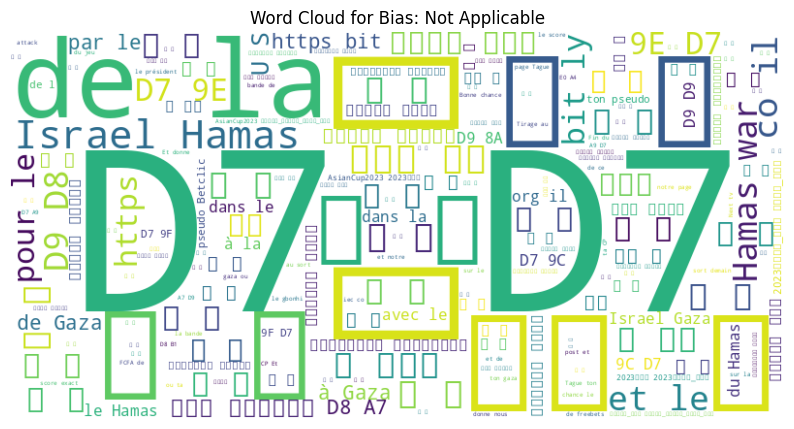

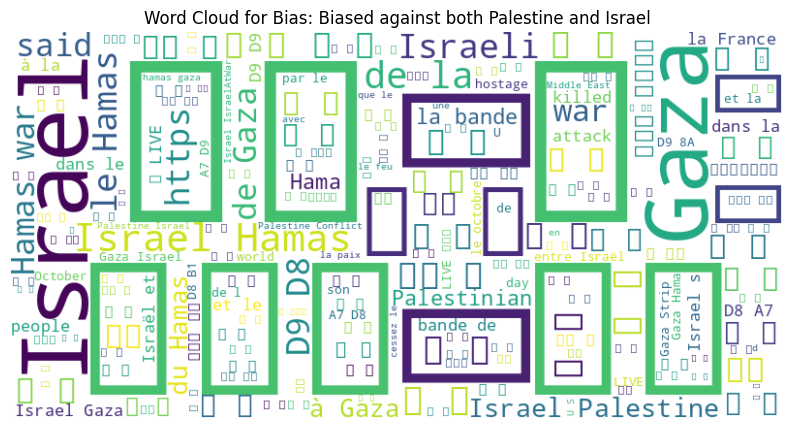

In [9]:
# Generate and display word clouds for each Bias label
bias_labels = bias_counts.index
for bias_label in bias_labels:
    bias_text = " ".join(df[df['label'] == bias_label]['text'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(bias_text)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Bias: {bias_label}")
    plt.axis("off")
    plt.show()


In [11]:
%pip install camel-tools farasapy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords

import os

# CAMeL Tools (tokenizer + disambiguator for lemmas)
from camel_tools.tokenizers.word import simple_word_tokenize
from camel_tools.disambig.mle import MLEDisambiguator

# Farasa (farasapy) segmentation + stemming
from farasa.segmenter import FarasaSegmenter
from farasa.stemmer import FarasaStemmer

In [11]:
# 3. Drop irrelevant columns
# Drop irrelevant columns (only keep 'arabic_mt' for preprocessing)
df_bias = df_bias[['arabic_mt', 'label']]  # Keep only Arabic text and the bias label



In [12]:
# 4. Data Cleaning Functions

def normalize_unicode(text):
    return text.encode('utf-8', errors='ignore').decode('utf-8')

def basic_clean(text):
    text = normalize_unicode(text)
    text = text.replace('\n', ' ')
    return text

def remove_tashkeel(text):
    arabic_diacritics = re.compile(r"""
        ّ    | # shadda
        َ    | # fatha
        ً    | # tanwin fatha
        ُ    | # damma
        ٌ    | # tanwin damma
        ِ    | # kasra
        ٍ    | # tanwin kasra
        ْ    | # sukun
        ـ     # tatwil/kashida
    """, re.VERBOSE)
    return re.sub(arabic_diacritics, "", text)

def light_normalize(text):
    text = remove_tashkeel(text)
    text = re.sub(r'[إأآا]', 'ا', text)
    text = re.sub('ى', 'ي', text)
    text = re.sub('ؤ', 'و', text)
    text = re.sub('ئ', 'ي', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text


In [13]:
# 5. Apply basic and extra cleaning to Arabic text
df_bias['arabic_mt'] = df_bias['arabic_mt'].apply(lambda x: light_normalize(basic_clean(x)))


In [14]:
df_bias.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88500 entries, 0 to 129799
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   arabic_mt  88500 non-null  object
 1   label      88500 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


In [17]:
!pip install pandarallel


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
!pip install ipywidgets


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
from pandarallel import pandarallel

# Initialize pandarallel
pandarallel.initialize(progress_bar=True)

# --- Define functions WITH imports inside them ---

def sentence_tokenize_arabic(text):
    import re  # <--- IMPORT MUST BE HERE FOR PARALLEL WORKERS
    
    if not isinstance(text, str): return []
    sentences = re.split(r'(?<=[\.\!\؟\?\،\؛\:])\s+', text)
    return [s.strip() for s in sentences if s.strip()]

def word_tokenize_list(sentences):
    # It is safer to import this here as well
    from camel_tools.tokenizers.word import simple_word_tokenize 
    
    return [simple_word_tokenize(s) for s in sentences]

# --- Run the parallel tasks ---

print("Starting Sentence Tokenization...")
# This will now work because 're' is imported inside the worker function
df_bias['Arabic_Sentences'] = df_bias['arabic_mt'].parallel_apply(sentence_tokenize_arabic)

print("Starting Word Tokenization...")
df_bias['Arabic_Tokens'] = df_bias['Arabic_Sentences'].parallel_apply(word_tokenize_list)

print("Done.")

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/
Starting Sentence Tokenization...


Starting Word Tokenization...


Done.


In [16]:
df_bias[['arabic_mt', 'Arabic_Sentences', 'Arabic_Tokens']].head()

,arabic_mt,Arabic_Sentences,Arabic_Tokens
0,خاض الحوثيون في اليمن الحرب بين اسراييل وحماس ...,[خاض الحوثيون في اليمن الحرب بين اسراييل وحماس...,"[[خاض, الحوثيون, في, اليمن, الحرب, بين, اسرايي..."
1,اسراييل - الصراع مع حماس | وجها لوجه,[اسراييل - الصراع مع حماس | وجها لوجه],"[[اسراييل, -, الصراع, مع, حماس, |, وجها, لوجه]]"
2,اظهرت مقاطع فيديو كيف اقتحم مسلحون من غزة مهرج...,[اظهرت مقاطع فيديو كيف اقتحم مسلحون من غزة مهر...,"[[اظهرت, مقاطع, فيديو, كيف, اقتحم, مسلحون, من,..."
3,وقفة احتجاجية في جامعة عليكرة الاسلامية دعما ل...,[وقفة احتجاجية في جامعة عليكرة الاسلامية دعما ...,"[[وقفة, احتجاجية, في, جامعة, عليكرة, الاسلامية..."
4,الجيش الاسراييلي ينشر تسجيلا صوتيا حول صاروخ غ...,[الجيش الاسراييلي ينشر تسجيلا صوتيا حول صاروخ ...,"[[الجيش, الاسراييلي, ينشر, تسجيلا, صوتيا, حول,..."


In [17]:
import os

# 1. Load Stopwords 
STOPWORDS_PATH = "list.txt" 
# Note: Ensure this path is correct for your local machine if you aren't on Colab/Linux
# e.g., might be "C:/path/to/list.txt"

if not os.path.exists(STOPWORDS_PATH):
    # Just creating a dummy set for the code to run if file is missing in this example
    print(f"Warning: {STOPWORDS_PATH} not found. Creating empty set.")
    STOPWORDS = set()
else:
    with open(STOPWORDS_PATH, "r", encoding="utf-8") as f:
        STOPWORDS = set([line.strip() for line in f if line.strip()])

# 2. Define the worker function
# We add 'stopwords_set' as an argument so we can pass the data in explicitly
def process_stopwords_parallel(tokens_list, stopwords_set):
    # Safety check
    if not isinstance(tokens_list, list):
        return []
    
    # Logic: Flatten the list of lists AND remove stopwords in one pass
    # 'tokens_list' structure is likely [[word, word], [word, word]] (sentences -> words)
    cleaned_tokens = []
    for sublist in tokens_list:
        if isinstance(sublist, list):
            for token in sublist:
                # Check if token is valid and not in stopwords
                if token and token.strip() and token not in stopwords_set:
                    cleaned_tokens.append(token)
    
    return cleaned_tokens

# 3. Apply in parallel
print("Starting Stopword Removal...")

# We use the keyword argument 'stopwords_set' to pass the global STOPWORDS variable
df_bias['Arabic_Tokens_No_Stop'] = df_bias['Arabic_Tokens'].parallel_apply(
    process_stopwords_parallel, 
    stopwords_set=STOPWORDS
)

print("Stopword Removal complete.")

Starting Stopword Removal...


Stopword Removal complete.


In [18]:
df_bias[['Arabic_Tokens', 'Arabic_Tokens_No_Stop']].head()

,Arabic_Tokens,Arabic_Tokens_No_Stop
0,"[[خاض, الحوثيون, في, اليمن, الحرب, بين, اسرايي...","[خاض, الحوثيون, اليمن, الحرب, اسراييل, وحماس, ..."
1,"[[اسراييل, -, الصراع, مع, حماس, |, وجها, لوجه]]","[اسراييل, -, الصراع, حماس, |, وجها, لوجه]"
2,"[[اظهرت, مقاطع, فيديو, كيف, اقتحم, مسلحون, من,...","[اظهرت, مقاطع, فيديو, اقتحم, مسلحون, غزة, مهرج..."
3,"[[وقفة, احتجاجية, في, جامعة, عليكرة, الاسلامية...","[وقفة, احتجاجية, جامعة, عليكرة, الاسلامية, دعم..."
4,"[[الجيش, الاسراييلي, ينشر, تسجيلا, صوتيا, حول,...","[الجيش, الاسراييلي, ينشر, تسجيلا, صوتيا, صاروخ..."


In [23]:
from pandarallel import pandarallel

# Initialize pandarallel
pandarallel.initialize(progress_bar=True)

# --- Define Worker Function ---
def process_lemma_parallel(sent_tokens):
    import sys
    # Import inside the function for Windows compatibility
    from camel_tools.disambig.mle import MLEDisambiguator
    
    # 1. Safety Check
    if not sent_tokens or not isinstance(sent_tokens, list):
        return []
    
    # 2. Worker Caching (Load the heavy model ONLY once per CPU core)
    this_module = sys.modules[__name__]
    
    if not hasattr(this_module, 'worker_mle'):
        # This loads the database (~hundreds of MBs). 
        # Doing this once per worker is crucial.
        try:
            this_module.worker_mle = MLEDisambiguator.pretrained()
        except Exception as e:
            # Fallback or error logging if model fails to load
            return sent_tokens

    mle = this_module.worker_mle
    
    # 3. Lemmatization Logic
    try:
        # mle.disambiguate takes a list of words (a sentence)
        disambig = mle.disambiguate(sent_tokens)
        
        sent_lemmas = []
        for dw in disambig:
            if dw.analyses:
                # Get the top analysis
                top = dw.analyses[0].analysis
                # Try 'lemma', then 'lex', then fallback to original word
                lemma = top.get('lemma') or top.get('lex') or dw.word
                sent_lemmas.append(lemma)
            else:
                sent_lemmas.append(dw.word)
                
        return sent_lemmas
        
    except Exception:
        # If any error occurs during processing, return original tokens
        return sent_tokens

# --- Apply in Parallel ---
print("Starting CAMeL Lemmatization...")
print("Note: The progress bar might pause at the start while workers load the model.")

# I switched the input to 'Arabic_Tokens_No_Stop' for better accuracy.
# If you strictly want stems, change it back to 'Arabic_Tokens_Stems'.
df_bias['Arabic_Lemmas'] = df_bias['Arabic_Tokens_No_Stop'].parallel_apply(process_lemma_parallel)

print("Lemmatization complete.")

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/
Starting CAMeL Lemmatization...
Note: The progress bar might pause at the start while workers load the model.


Lemmatization complete.


In [25]:
df_bias[['Arabic_Tokens_No_Stop', 'Arabic_Lemmas']].head()

,Arabic_Tokens_No_Stop,Arabic_Lemmas
0,"[خاض, الحوثيون, اليمن, الحرب, اسراييل, وحماس, ...","[خاض, الحوثيون, يَمَن, حَرْب, اسراييل, حَماس, ..."
1,"[اسراييل, -, الصراع, حماس, |, وجها, لوجه]","[اسراييل, -, صِراع, حَماس, |, وَجْه, وَجْه]"
2,"[اظهرت, مقاطع, فيديو, اقتحم, مسلحون, غزة, مهرج...","[أَظْهَر, مَقْطَع, فِيدْيُو, ٱِقْتَحَم, مُسَلّ..."
3,"[وقفة, احتجاجية, جامعة, عليكرة, الاسلامية, دعم...","[وَقْفَة, ٱِحْتِجاج, جامِعَة, عليكره, إِسْلامِ..."
4,"[الجيش, الاسراييلي, ينشر, تسجيلا, صوتيا, صاروخ...","[جَيْش, الاسراييلي, نَشَر, تَسْجِيل, صَوْتِيّ,..."


In [26]:
# 10. Save the processed data to a new file
output_path = "preprocessed_bias_data.tsv"
# Save the processed DataFrame in the same .tsv format
df_bias.to_csv(output_path, sep='\t', index=False)


In [27]:
# 11. Display a sample of the processed data
df_bias.head()

,arabic_mt,label,Arabic_Sentences,Arabic_Tokens,Arabic_Tokens_No_Stop,raw_char_len,raw_word_count,Arabic_Lemmas
0,خاض الحوثيون في اليمن الحرب بين اسراييل وحماس ...,Biased against others,[خاض الحوثيون في اليمن الحرب بين اسراييل وحماس...,"[[خاض, الحوثيون, في, اليمن, الحرب, بين, اسرايي...","[خاض, الحوثيون, اليمن, الحرب, اسراييل, وحماس, ...",356,41,"[خاض, الحوثيون, يَمَن, حَرْب, اسراييل, حَماس, ..."
1,اسراييل - الصراع مع حماس | وجها لوجه,Unbiased,[اسراييل - الصراع مع حماس | وجها لوجه],"[[اسراييل, -, الصراع, مع, حماس, |, وجها, لوجه]]","[اسراييل, -, الصراع, حماس, |, وجها, لوجه]",36,8,"[اسراييل, -, صِراع, حَماس, |, وَجْه, وَجْه]"
2,اظهرت مقاطع فيديو كيف اقتحم مسلحون من غزة مهرج...,Biased against others,[اظهرت مقاطع فيديو كيف اقتحم مسلحون من غزة مهر...,"[[اظهرت, مقاطع, فيديو, كيف, اقتحم, مسلحون, من,...","[اظهرت, مقاطع, فيديو, اقتحم, مسلحون, غزة, مهرج...",542,72,"[أَظْهَر, مَقْطَع, فِيدْيُو, ٱِقْتَحَم, مُسَلّ..."
3,وقفة احتجاجية في جامعة عليكرة الاسلامية دعما ل...,Unclear,[وقفة احتجاجية في جامعة عليكرة الاسلامية دعما ...,"[[وقفة, احتجاجية, في, جامعة, عليكرة, الاسلامية...","[وقفة, احتجاجية, جامعة, عليكرة, الاسلامية, دعم...",444,60,"[وَقْفَة, ٱِحْتِجاج, جامِعَة, عليكره, إِسْلامِ..."
4,الجيش الاسراييلي ينشر تسجيلا صوتيا حول صاروخ غ...,Biased against both Palestine and Israel,[الجيش الاسراييلي ينشر تسجيلا صوتيا حول صاروخ ...,"[[الجيش, الاسراييلي, ينشر, تسجيلا, صوتيا, حول,...","[الجيش, الاسراييلي, ينشر, تسجيلا, صوتيا, صاروخ...",82,15,"[جَيْش, الاسراييلي, نَشَر, تَسْجِيل, صَوْتِيّ,..."


In [36]:
!pip install gensim


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
!pip install fasttext-wheel


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
import fasttext
model = fasttext.load_model("C:\\Users\\hossa\\OneDrive\\Documents\\nlp fall 2025\\nlp_project\\cc.ar.300.bin\\cc.ar.300.bin")

In [36]:
def get_fasttext_pretrained_vector(tokens):
    # 1. Safety check for empty or null rows
    if not isinstance(tokens, list) or not tokens:
        return np.zeros(model.get_dimension())

    # 2. FLATTENING LOGIC (The Fix)
    # Check if the first item is a list. If so, it's [[sent1], [sent2]].
    # We flatten it to [word1, word2, word3...]
    if len(tokens) > 0 and isinstance(tokens[0], list):
        flat_tokens = [t for sublist in tokens for t in sublist]
    else:
        flat_tokens = tokens

    # 3. Vector Generation
    vectors = []
    for w in flat_tokens:
        # Extra safety: Ensure 'w' is actually a string before passing to FastText
        if isinstance(w, str) and w.strip():
            try:
                vec = model.get_word_vector(w)
                vectors.append(vec)
            except Exception:
                continue
    
    # 4. Return Average
    if len(vectors) == 0:
        return np.zeros(model.get_dimension())
        
    return np.mean(vectors, axis=0)

# --- Apply ---

print("Generating vectors for 'Arabic_Tokens' (Nested List)...")
df_bias['fasttext_embedding_tokens'] = df_bias['Arabic_Tokens'].apply(get_fasttext_pretrained_vector)

print("Generating vectors for 'Arabic_Tokens_No_Stop' (Flat List)...")
df_bias['fasttext_embedding_no_stop'] = df_bias['Arabic_Tokens_No_Stop'].apply(get_fasttext_pretrained_vector)

print("Done.")

Generating vectors for 'Arabic_Tokens' (Nested List)...
Generating vectors for 'Arabic_Tokens_No_Stop' (Flat List)...
Done.


In [37]:
df_bias['fasttext_embedding_no_stop'].head()

0    [-0.025524614, 0.003297181, 0.01047447, -0.010...
1    [0.024848888, 0.035446607, -0.016489733, -0.13...
2    [-0.016941013, 0.006092441, 0.015798595, -0.00...
3    [0.01388624, -0.014357756, -0.023291627, 0.103...
4    [0.012291973, 0.006929502, 0.0106274495, 0.049...
Name: fasttext_embedding_no_stop, dtype: object

In [38]:
df_bias['fasttext_embedding_tokens'].head()

0    [-0.016680963, 0.0063548344, 0.004315821, -0.0...
1    [0.012183705, 0.03628149, -0.020844618, -0.123...
2    [-0.011684215, 0.0072363727, 0.0028749267, 0.0...
3    [0.011649302, -0.008605903, -0.021511203, 0.09...
4    [0.0069554937, 0.0033625448, -0.011992725, 0.0...
Name: fasttext_embedding_tokens, dtype: object

In [66]:
!pip install arabic-reshaper python-bidi


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Running TSNE on 1000 samples...


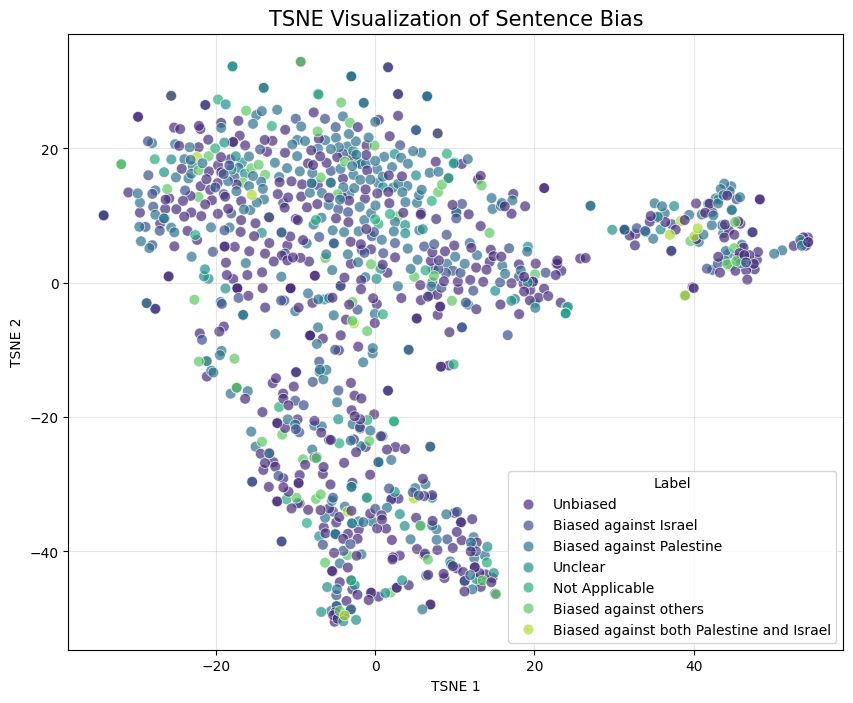

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def visualize_sentence_bias(df, vector_col, label_col, sample=1000, method='tsne', perplexity=30):
    """
    Adapted from your lab code to work with DataFrame Sentence Embeddings.
    """
    # 1. Sampling (Visualizing 50k points is too slow/messy, we take a sample)
    if sample and sample < len(df):
        df_sample = df.sample(sample, random_state=42)
    else:
        df_sample = df

    # 2. Prepare Data (Stack list of arrays into a Matrix)
    matrix = np.stack(df_sample[vector_col].values)
    labels = df_sample[label_col].values

    # 3. Dimensionality Reduction
    print(f"Running {method.upper()} on {len(df_sample)} samples...")
    
    if method == 'pca':
        reducer = PCA(n_components=2)
        reduced_vectors = reducer.fit_transform(matrix)
    elif method == 'tsne':
        # Note: 'n_iter' changed to 'max_iter' in newer sklearn versions
        reducer = TSNE(n_components=2, perplexity=perplexity, random_state=42, max_iter=1000)
        reduced_vectors = reducer.fit_transform(matrix)
    else:
        raise ValueError("Method must be 'pca' or 'tsne'")

    # 4. Plotting
    plt.figure(figsize=(10, 8))
    
    # We use Seaborn because it handles color classes (hue) automatically
    sns.scatterplot(
        x=reduced_vectors[:, 0], 
        y=reduced_vectors[:, 1], 
        hue=labels,          # Color points by Bias/Neutral
        palette='viridis', 
        alpha=0.7, 
        s=60
    )

    plt.title(f'{method.upper()} Visualization of Sentence Bias', fontsize=15)
    plt.xlabel(f'{method.upper()} 1')
    plt.ylabel(f'{method.upper()} 2')
    plt.legend(title='Label')
    plt.grid(True, alpha=0.3)
    plt.show()

# --- RUN IT ---
# Use the 'no_stop' column as it usually has cleaner signals
visualize_sentence_bias(df_bias, 'fasttext_embedding_no_stop', 'label', sample=1000, method='tsne')

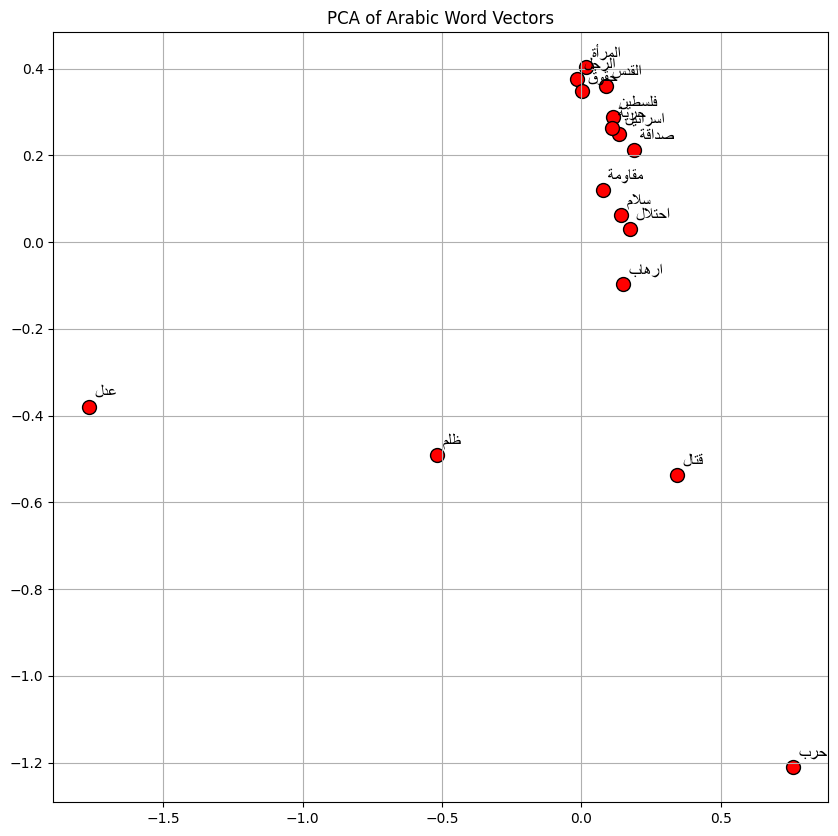

In [42]:
import arabic_reshaper
from bidi.algorithm import get_display

def display_arabic_word_embedding(ft_model, words, method='pca', perplexity=5):
    """
    Adapted from your lab code to handle FastText + Arabic Text.
    """
    # 1. Get Vectors
    # FastText is different: it generates vectors even for unknown words
    # We filter out empty strings just in case
    valid_words = [w for w in words if w.strip()]
    word_vectors = np.array([ft_model.get_word_vector(w) for w in valid_words])

    # 2. Dimensionality Reduction
    if method == 'pca':
        reduced_vectors = PCA(n_components=2).fit_transform(word_vectors)
    elif method == 'tsne':
        # Adjust perplexity if number of words is small
        actual_perplexity = min(perplexity, len(valid_words) - 1)
        reduced_vectors = TSNE(n_components=2, perplexity=actual_perplexity, random_state=42, max_iter=1000).fit_transform(word_vectors)

    # 3. Plotting
    plt.figure(figsize=(10, 10))
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c='red', edgecolors='k', s=100)

    # 4. Add Arabic Labels
    for word, (x, y) in zip(valid_words, reduced_vectors):
        # Fix Arabic Direction (Right-to-Left) and Connection
        reshaped_text = arabic_reshaper.reshape(word)
        bidi_text = get_display(reshaped_text)
        
        plt.text(x + 0.02, y + 0.02, bidi_text, fontsize=12, fontfamily='Arial')

    plt.title(f'{method.upper()} of Arabic Word Vectors')
    plt.grid(True)
    plt.show()

# --- RUN IT ---
# Example list of words relevant to bias/politics
arabic_words = [
    'سلام', 'حرب', 'قتال', 'صداقة', 
    'المرأة', 'الرجل', 'حقوق', 'ظلم',
    'فلسطين', 'اسرائيل', 'القدس', 'احتلال',
    'ارهاب', 'مقاومة', 'عدل', 'حرية'
]

# Note: This requires the 'ft_model' you loaded earlier
# If you didn't load it in this session, uncomment the next line:
# import fasttext; ft_model = fasttext.load_model("cc.ar.300.bin")

display_arabic_word_embedding(model, arabic_words, method='pca')

In [43]:
import plotly.express as px
from sklearn.manifold import TSNE
import numpy as np

# 1. Prepare Matrix
matrix = np.stack(df_bias['fasttext_embedding_no_stop'].values)
labels = df_bias['label'].values
# Take a sample for speed/clarity
sample_size = 1000
indices = np.random.choice(len(matrix), sample_size, replace=False)

# 2. Run t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
projections = tsne.fit_transform(matrix[indices])

# 3. Create DataFrame for Plotly
df_viz = pd.DataFrame({
    'x': projections[:, 0],
    'y': projections[:, 1],
    'label': labels[indices],
    # Add the actual text so we can read it on hover!
    'text': df_bias['arabic_mt'].iloc[indices].values 
})

# 4. Interactive Plot
fig = px.scatter(
    df_viz, x='x', y='y', color='label',
    hover_data=['text'], # <--- This enables reading the sentence
    title='Interactive t-SNE of Bias Embeddings'
)
fig.show()